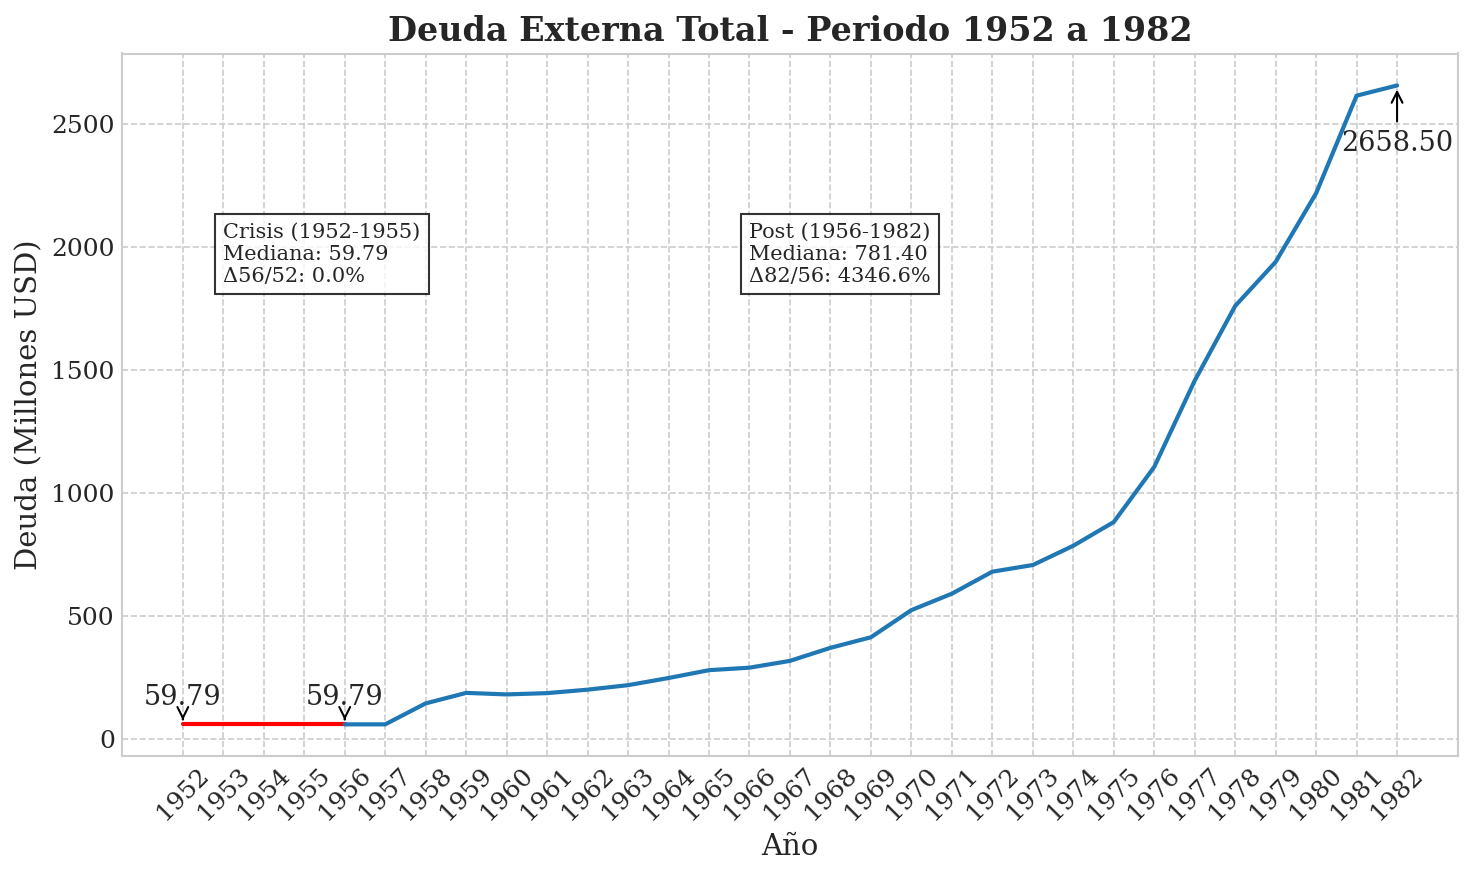

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

# --- Directorios de salida ---
base_path = "../../../assets/tesis/intervensionismo_estatal"
dir_period1 = os.path.join(base_path, "1952-1956")
dir_period2 = os.path.join(base_path, "1956-1982")
dir_completa = os.path.join(base_path, "serie_completa")
for d in [dir_period1, dir_period2, dir_completa]:
    if not os.path.exists(d):
        os.makedirs(d)

# --- Configuración de estilo profesional ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'figure.dpi': 150,
    'savefig.bbox': 'tight'
})

# --- Conexión y carga de datos de deuda externa ---
conn = sqlite3.connect('../../../db/proyectomacro.db')
df_deuda = pd.read_sql_query("SELECT * FROM deuda_externa_total", conn)
conn.close()

# Establecer el índice y recortar al periodo 1952-1982
df_deuda.set_index('año', inplace=True)
df_deuda = df_deuda.loc[1952:1982]

# Función para generar el texto de estadísticas descriptivas
def get_desc_text(series, label):
    desc = series.describe()
    return (f"{label}\nMean: {desc['mean']:.2f}\nStd: {desc['std']:.2f}\n"
            f"Min: {desc['min']:.2f}\nMax: {desc['max']:.2f}")

def cuadro_estadisticas(serie):
    mean = serie.mean()
    g56  = (serie.loc[1956] - serie.loc[1952]) / serie.loc[1952] * 100
    return (f"Crisis (1952‑1955)\nMediana: {mean:.2f}\n"
            f"Δ56/52: {g56:.1f}%")

def cuadro_estadisticas_post(serie):
    mean = serie.loc[1956:1982].mean()
    g56  = 0                                 # ya es el punto inicial post‑crisis
    g82  = (serie.loc[1982] - serie.loc[1956]) / serie.loc[1956] * 100
    return (f"Post (1956‑1982)\nMediana: {mean:.2f}\n"
            f"Δ82/56: {g82:.1f}%")
# ---------------- Gráfico 1: Periodo 1952 a 1956 ----------------
df_period1 = df_deuda.loc[1952:1956]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_period1.index, df_period1['deuda'], marker='o', linestyle='-')

# Anotaciones en años clave (1952 y 1956)
for year in [1952, 1956]:
    if year in df_period1.index:
        value = df_period1.loc[year, 'deuda']
        # Para 1956 se anota con un offset ligeramente superior; para 1952, arriba
        offset = value * 1.1 if year == 1952 else value * 1.05
        ax.annotate(f"{value:.2f}", xy=(year, value), xytext=(year, value+0.3),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=13, ha='center')

ax.set_title("Deuda Externa Total - Periodo 1952 a 1956", fontweight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("Deuda (Millones USD)")
plt.xticks(df_period1.index, rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(dir_period1, "deuda_externa.png"))
plt.close()

# ---------------- Gráfico 2: Periodo 1956 a 1982 ----------------
df_period2 = df_deuda.loc[1956:1982]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_period2.index, df_period2['deuda'], marker='o', linestyle='-')
# Anotaciones para 1956 y 1982
for year in [1956, 1982]:
    if year in df_period2.index:
        value = df_period2.loc[year, 'deuda']
        offset = value +90 if year == 1956 else value * 0.90
        ax.annotate(f"{value:.2f}", xy=(year, value), xytext=(year, offset),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=13, ha='center')

ax.set_title("Deuda Externa Total - Periodo 1956 a 1982", fontweight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("Deuda (Millones USD)")
plt.xticks(df_period2.index, rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(dir_period2, "deuda_externa.png"))
plt.close()
 
# ---------------- Gráfico 3: Serie completa 1952 a 1982 ----------------
text_full_crisis = cuadro_estadisticas(df_deuda.loc[1952:1956,'deuda'])
text_full_post = cuadro_estadisticas_post(df_deuda.loc[1956:1982,'deuda'])
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_deuda.loc[1952:1956,'deuda'],color='red', linestyle='-')
ax.plot(df_deuda.loc[1956:1982,'deuda'],color='#1f77b4', linestyle='-')
# Anotaciones en años clave: 1952, 1956 y 1982
for year in [1952, 1956, 1982]:
    if year in df_deuda.index:
        value = df_deuda.loc[year, 'deuda']
        offset = value+80 if year != 1982 else value * 0.90
        ax.annotate(f"{value:.2f}", xy=(year, value), xytext=(year, offset),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=13, ha='center')
ax.text(1953, df_deuda['deuda'].max() * 0.70, text_full_crisis,
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

ax.text(1966, df_deuda['deuda'].max() * 0.70, text_full_post,
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
ax.set_title("Deuda Externa Total - Periodo 1952 a 1982", fontweight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("Deuda (Millones USD)")
plt.xticks(df_deuda.index, rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(dir_completa, "deuda_externa.png"))
plt.show()
plt.close()
